<a href="https://colab.research.google.com/github/ogunsegun/-QHack2023_OGUNTUNNBI-SEGUN/blob/main/Environment_temperature_climate_change_EG_ABI_DATA_VISUALISATION_COMPETITION_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Climate Change**

The dataset which i use for the visualisation is called Environment_Temperature_change_E_All_Data_NOFLAG ehich was own by a researcher i download the data on https://www.kaggle.com/ for my own analysis.

Climate change refers to significant and long-term alterations in the Earth's climate patterns, often attributed to human activities. It encompasses shifts in temperature, precipitation, sea levels, and other indicators over extended periods, usually decades or longer.

The dataset is base on Temperature, from 1961-2019 which was gotten from FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2019. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available.² It includes areas of all the countries and territories of the world. (In 2019: 190 countries and 37 other territorial entities) The data covers monthly, seasonal, yearly temperature changes as Celsius degrees °C between 1961 and 2019. The frequency of dissemination and Release calendar of the data is the yearly base. The format is a comma-separated value (CSV) file, has the tabular format and 6.3 megabytes. It includes 9656 rows and 66 columns.

In [ ]:
import pandas as pd
# generate country code  based on country name
import geopandas as gpd

import xarray as xr
import hvplot.pandas  # noqa
import hvplot.xarray  # noqa
import cartopy.crs as ccrs


In [11]:
pip install seaborn

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
#from mpl_toolkits.basemap import Basemap

In [5]:
import seaborn as sns

In [7]:
url = '/content/Environment_Temperature_change_E_All_Data_NOFLAG.csv'
df = pd.read_csv(url, encoding="ISO-8859-1")
df.head()

Area Code         Area  Months Code    Months  Element Code  \
0          2  Afghanistan         7001   January          7271   
1          2  Afghanistan         7001   January          6078   
2          2  Afghanistan         7002  February          7271   
3          2  Afghanistan         7002  February          6078   
4          2  Afghanistan         7003     March          7271   

              Element Unit  Y1961  Y1962  Y1963  ...  Y2010  Y2011  Y2012  \
0  Temperature change   °C  0.777  0.062  2.744  ...  3.601  1.179 -0.583   
1  Standard Deviation   °C  1.950  1.950  1.950  ...  1.950  1.950  1.950   
2  Temperature change   °C -1.743  2.465  3.919  ...  1.212  0.321 -3.201   
3  Standard Deviation   °C  2.597  2.597  2.597  ...  2.597  2.597  2.597   
4  Temperature change   °C  0.516  1.336  0.403  ...  3.390  0.748 -0.527   

   Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
0  1.233  1.755  1.943  3.416  1.201  1.996  2.951  
1  1.950  1.950  1.950  1.950  1.950  1.950  1.950  
2  1.494 -3.187  2.699  2.251 -0.323  2.705  0.086  
3  2.597  2.597  2.597  2.597  2.597  2.597  2.597  
4  2.246 -0.076 -0.497  2.296  0.834  4.418  0.234  

[5 rows x 66 columns]

In [8]:
df.Y1961.sum()

3334.9590000000003

In [9]:
df.rename(columns = {'Area Code':'Area_Code','Months Code':'Months_Code', 'Element Code':'Element_Code'}, inplace = True)

In [10]:
df.head(2)

Area_Code         Area  Months_Code   Months  Element_Code  \
0          2  Afghanistan         7001  January          7271   
1          2  Afghanistan         7001  January          6078   

              Element Unit  Y1961  Y1962  Y1963  ...  Y2010  Y2011  Y2012  \
0  Temperature change   °C  0.777  0.062  2.744  ...  3.601  1.179 -0.583   
1  Standard Deviation   °C  1.950  1.950  1.950  ...  1.950  1.950  1.950   

   Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
0  1.233  1.755  1.943  3.416  1.201  1.996  2.951  
1  1.950  1.950  1.950  1.950  1.950  1.950  1.950  

[2 rows x 66 columns]

In [11]:
df_q = df[['Element', 'Y1961']]
df_q

Element  Y1961
0     Temperature change  0.777
1     Standard Deviation  1.950
2     Temperature change -1.743
3     Standard Deviation  2.597
4     Temperature change  0.516
...                  ...    ...
9651  Standard Deviation  0.247
9652  Temperature change  0.036
9653  Standard Deviation  0.378
9654  Temperature change  0.165
9655  Standard Deviation  0.260

[9656 rows x 2 columns]

from matplotlib import pyplot as plt
df_q['Y1961'].plot(kind='hist', bins=20, title='Y1961')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_q.groupby('Element').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_q['Y1961'].plot(kind='line', figsize=(8, 4), title='Y1961')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_q['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_q, x='Y1961', y='Element', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

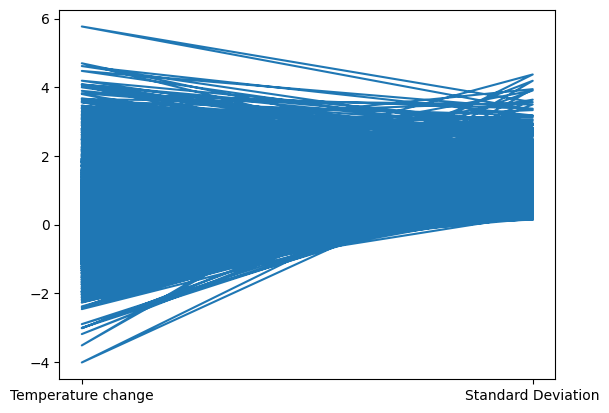

In [30]:
plt.plot(df_q['Element'], df_q['Y1961'])

In [31]:
df_y19 = df[['Element', 'Y2004','Y2009','Y2014','Y2019']]
df_y19

Element  Y2004  Y2009  Y2014  Y2019
0     Temperature change  2.707  1.518  1.755  2.951
1     Standard Deviation  1.950  1.950  1.950  1.950
2     Temperature change  2.871  2.494 -3.187  0.086
3     Standard Deviation  2.597  2.597  2.597  2.597
4     Temperature change  2.753  2.362 -0.076  0.234
...                  ...    ...    ...    ...    ...
9651  Standard Deviation  0.247  0.247  0.247  0.247
9652  Temperature change  0.748  1.093  0.999  1.233
9653  Standard Deviation  0.378  0.378  0.378  0.378
9654  Temperature change  0.689  0.715  0.811  1.297
9655  Standard Deviation  0.260  0.260  0.260  0.260

[9656 rows x 5 columns]

from matplotlib import pyplot as plt
df_y19['Y2004'].plot(kind='hist', bins=20, title='Y2004')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_y19['Y2009'].plot(kind='hist', bins=20, title='Y2009')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_y19['Y2014'].plot(kind='hist', bins=20, title='Y2014')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_y19['Y2019'].plot(kind='hist', bins=20, title='Y2019')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_y19.groupby('Element').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_y19.plot(kind='scatter', x='Y2004', y='Y2009', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_y19.plot(kind='scatter', x='Y2009', y='Y2014', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_y19.plot(kind='scatter', x='Y2014', y='Y2019', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_y19['Y2004'].plot(kind='line', figsize=(8, 4), title='Y2004')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_y19['Y2009'].plot(kind='line', figsize=(8, 4), title='Y2009')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_y19['Y2014'].plot(kind='line', figsize=(8, 4), title='Y2014')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_y19['Y2019'].plot(kind='line', figsize=(8, 4), title='Y2019')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_y19['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_y19, x='Y2004', y='Element', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_y19['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_y19, x='Y2009', y='Element', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_y19['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_y19, x='Y2014', y='Element', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_y19['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_y19, x='Y2019', y='Element', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<BarContainer object of 9656 artists>

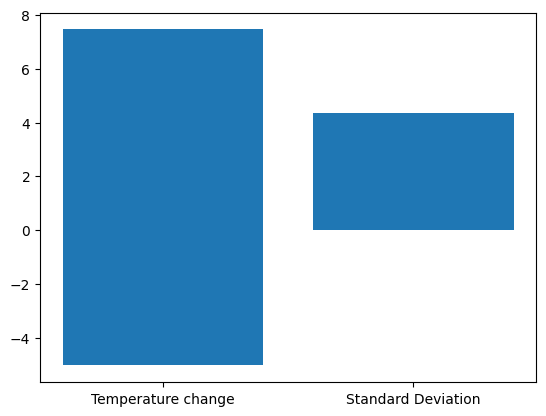

In [36]:
plt.bar(df_y19['Element'], df_y19['Y2004'])

<BarContainer object of 9656 artists>

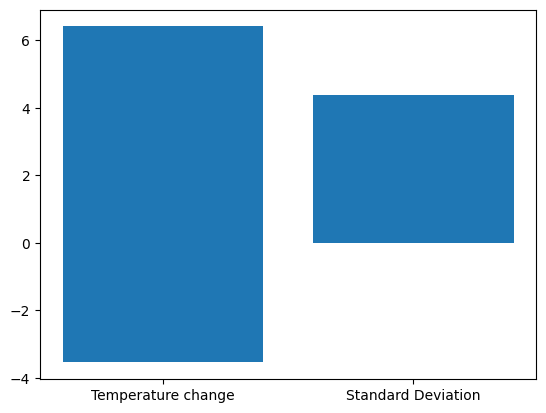

In [37]:
plt.bar(df_y19['Element'], df_y19['Y2009'])

<BarContainer object of 9656 artists>

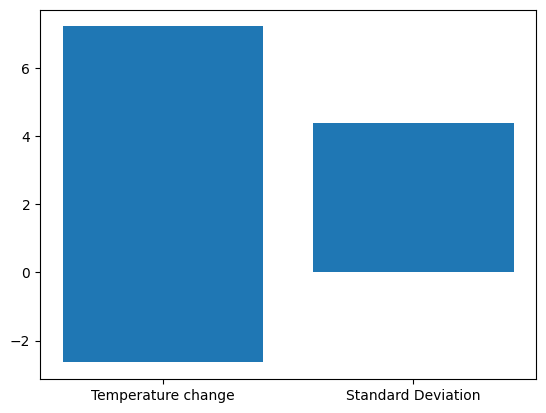

In [38]:
#Y2019

plt.bar(df_y19['Element'], df_y19['Y2019'])

In [39]:
cat_totals0 = df.groupby("Element")["Y1961"].sum().sort_values()
cat_totals0

Element
Temperature change     599.913
Standard Deviation    2735.046
Name: Y1961, dtype: float64

<Axes: title={'center': 'SUM OF TEMPERATUR CHANGE AND STANDARD DEVIATION IN 1961'}, ylabel='Element'>

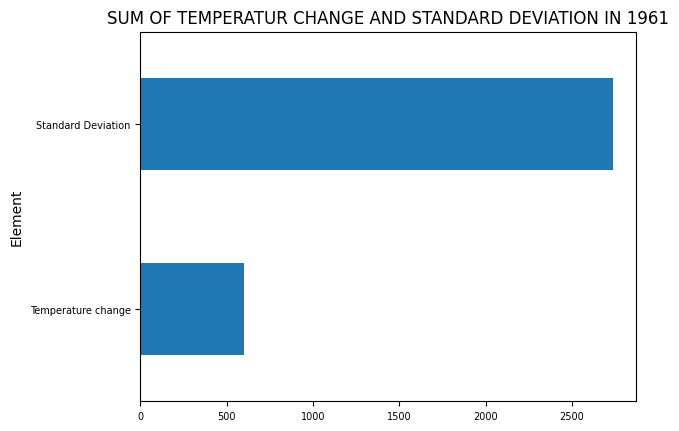

In [46]:
cat_totals0.plot(kind="barh", fontsize=7, title='SUM OF TEMPERATUR CHANGE AND STANDARD DEVIATION IN 1961')

In [44]:
cat_totals = df.groupby("Element")["Y2019"].sum().sort_values()
cat_totals

Element
Standard Deviation    2557.628
Temperature change    6598.696
Name: Y2019, dtype: float64

<Axes: title={'center': 'SUM OF TEMPERATUR CHANGE AND STANDARD DEVIATION IN 2019'}, ylabel='Element'>

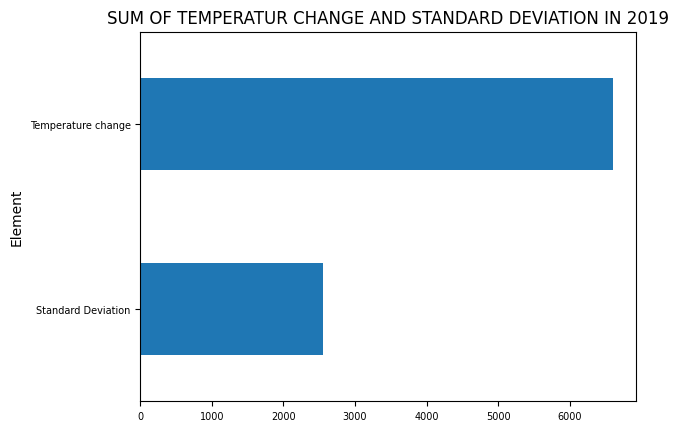

In [45]:
cat_totals.plot(kind="barh", fontsize=7, title='SUM OF TEMPERATUR CHANGE AND STANDARD DEVIATION IN 2019')

In [47]:
countries_totals = df.groupby("Area")["Y1961"].sum().sort_values()
countries_totals

Area
Nauru                             -6.029
Niger                             -2.684
Chad                              -0.825
Lithuania                          0.000
North Macedonia                    0.000
                                   ...  
Norway                            44.778
Poland                            45.021
Svalbard and Jan Mayen Islands    46.520
Sweden                            51.435
Finland                           61.607
Name: Y1961, Length: 284, dtype: float64

I visualize the relationship btween Y1971 and Y2009. And other years

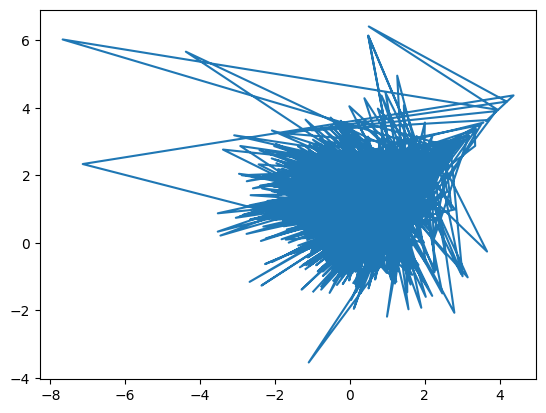

In [58]:
plt.plot(df.Y1971, df.Y2009)

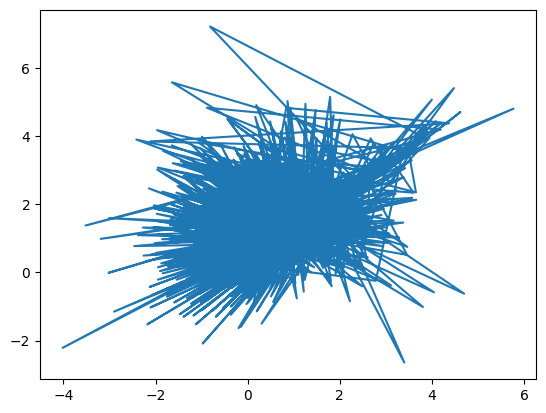

In [60]:
plt.plot(df.Y1961, df.Y2019);

[Text(0.5, 1.0, 'Relationship btween 1961 and 2019')]

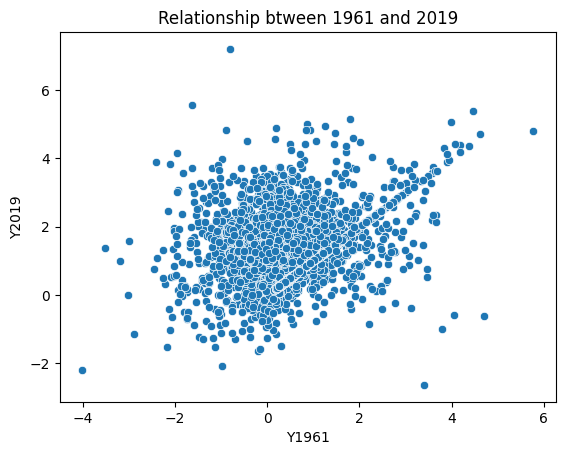

In [67]:
sns.scatterplot(x=df.Y1961, y=df.Y2019).set(title='Relationship btween 1961 and 2019')

[Text(0.5, 1.0, 'relationship btween 1971 and 2009')]

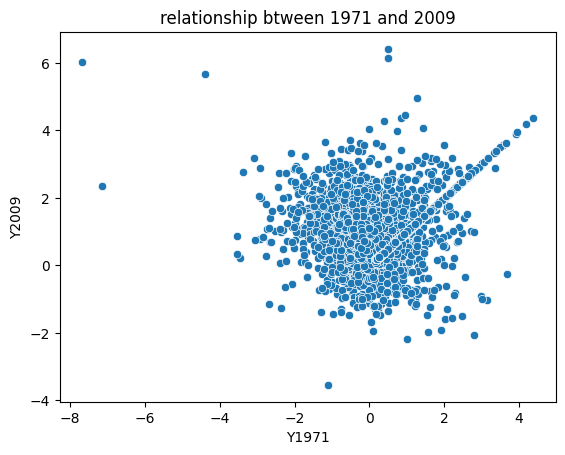

In [66]:
sns.scatterplot(x=df.Y1971, y=df.Y2009).set(title='Relationship btween 1971 and 2009')

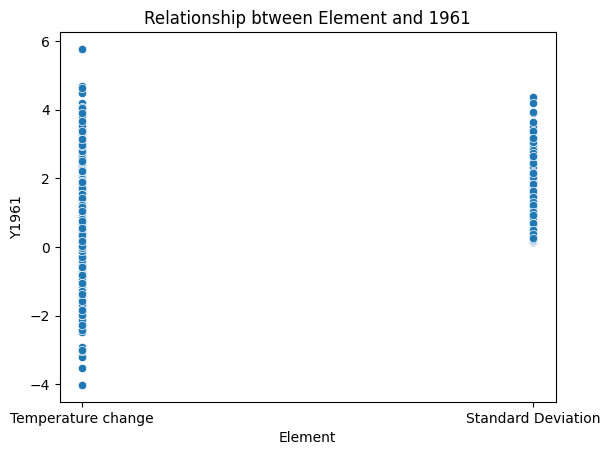

In [68]:
res = sns.scatterplot(x ="Element", y ="Y1961", data=df).set(title='Relationship btween Element and 1961')
plt.show()

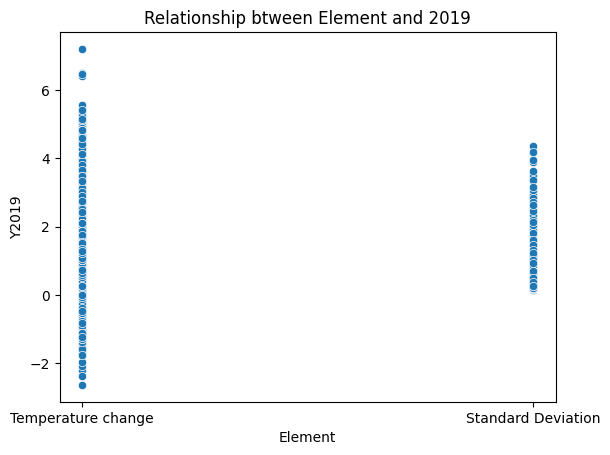

In [69]:
res = sns.scatterplot(x ="Element", y ="Y2019", data=df).set(title='Relationship btween Element and 2019')
plt.show()

Text(0.5, 0.98, 'Relationship btween Element with 1962 and 2019')

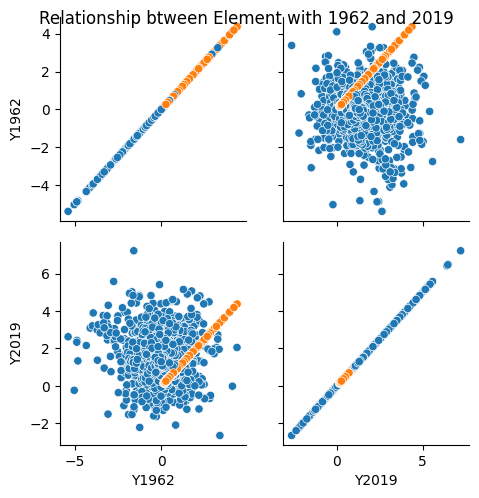

In [74]:
res = sns.PairGrid( data=df, vars=["Y1962","Y2019"], hue="Element")
res.map(sns.scatterplot)
res.fig.suptitle('Relationship btween Element with 1962 and 2019')

Text(0.5, 0.98, 'Relationship btween Element with 10 years different')

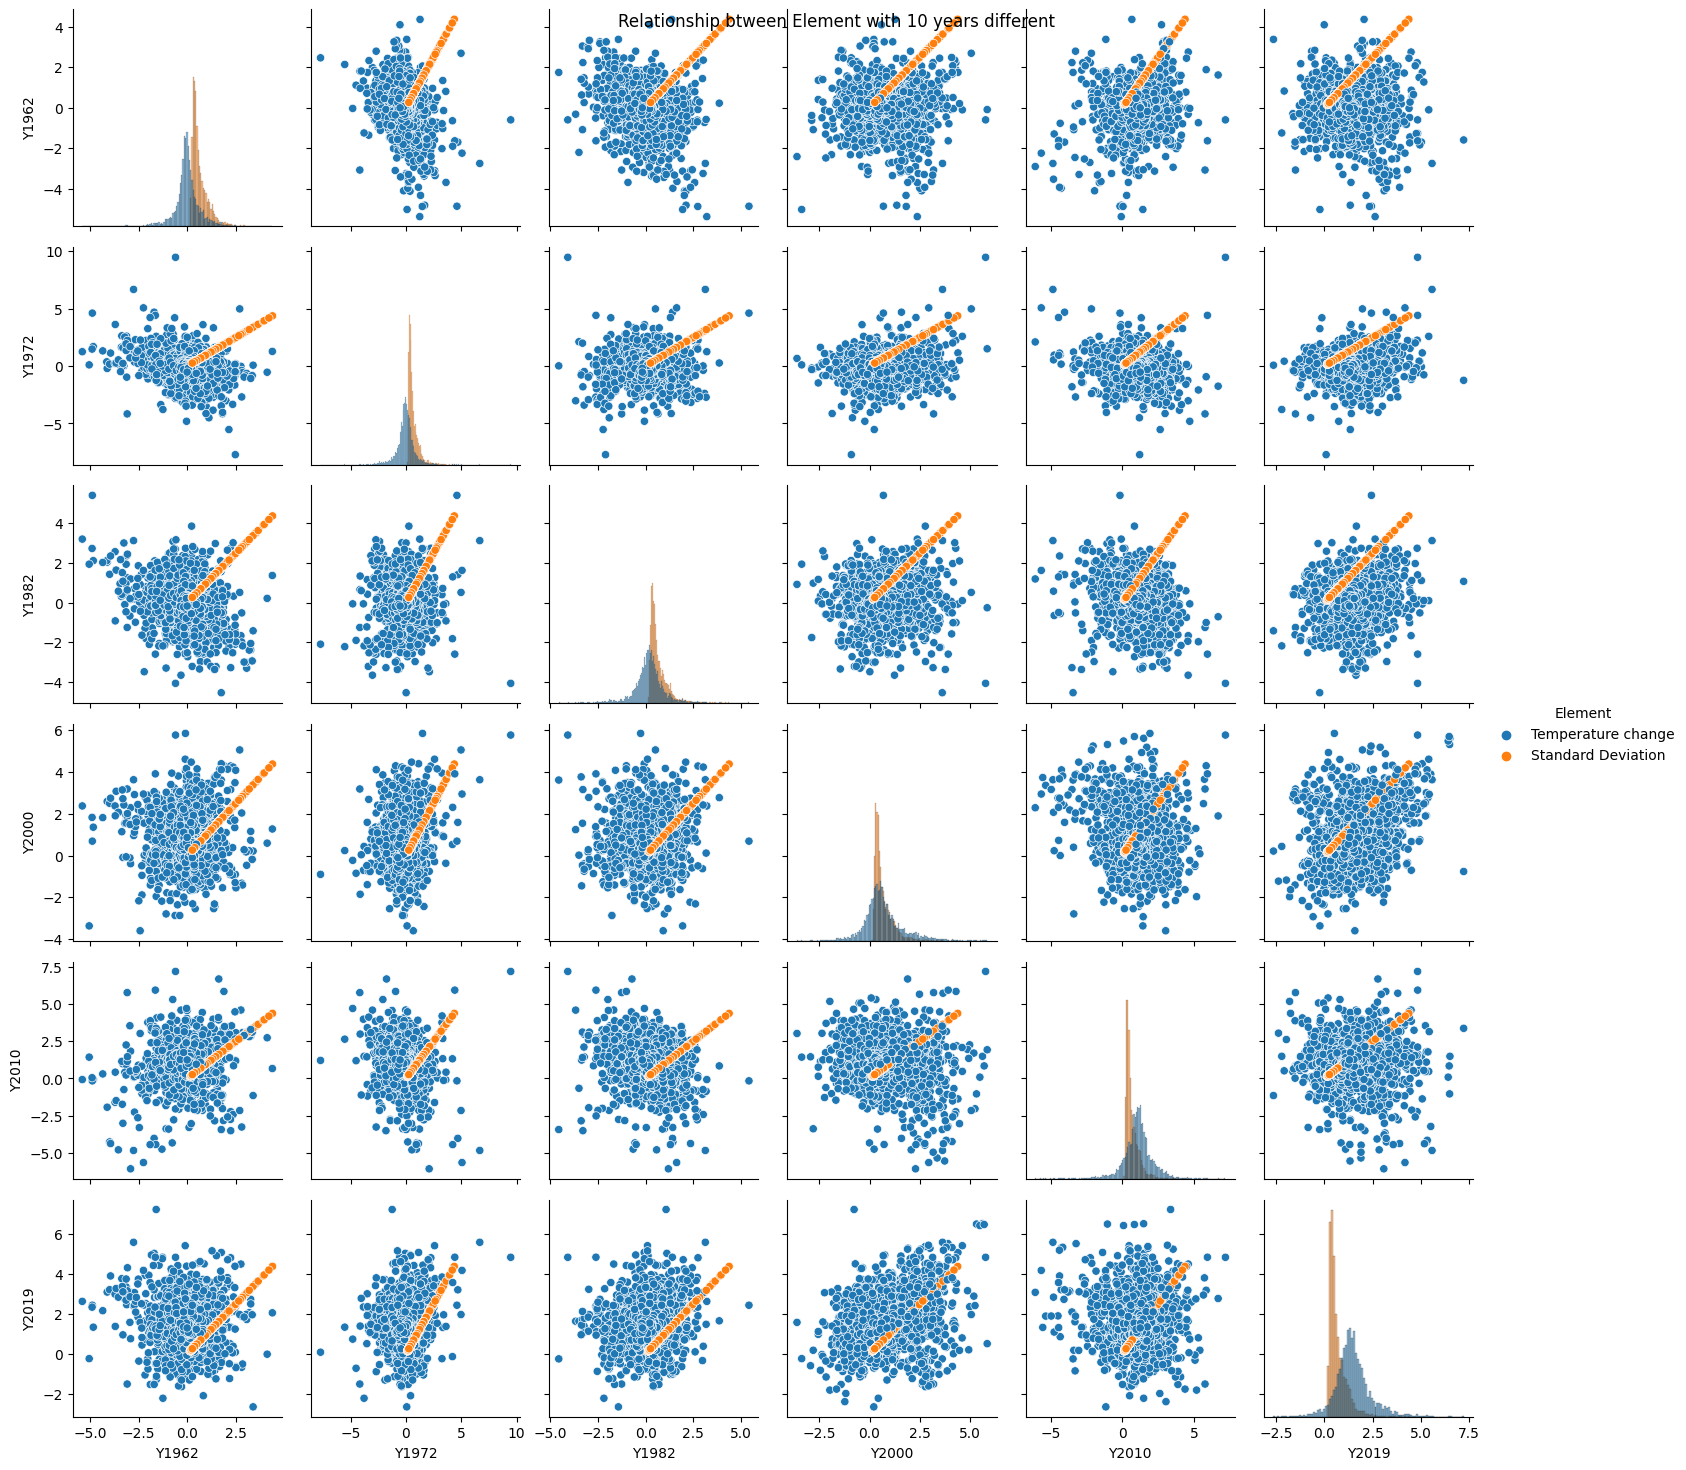

In [14]:
res2 = sns.PairGrid(data=df, vars=["Y1962","Y1972","Y1982","Y2000","Y2010","Y2019"],
                    hue="Element")
res2.map_diag(sns.histplot)
res2.map_offdiag(sns.scatterplot)
res2.add_legend()
res2.fig.suptitle('Relationship btween Element with 10 years different')

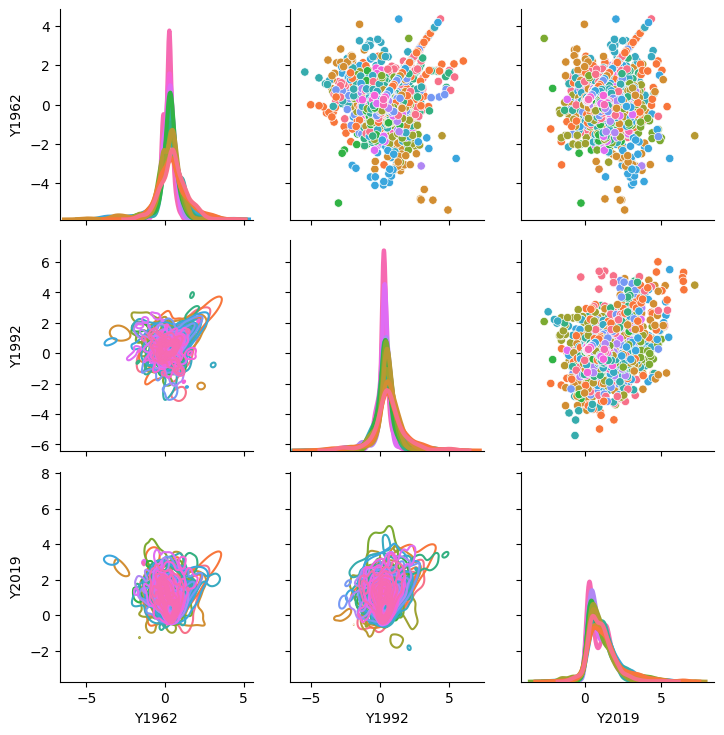

In [13]:
res3 = sns.PairGrid(data=df,  vars=["Y1962","Y1992", "Y2019"], hue="Months")
res3.map_upper(sns.scatterplot)
res3.map_lower(sns.kdeplot)
res3.map_diag(sns.kdeplot, lw=3, legend=False)

In [16]:
df.describe()

Area_Code  Months_Code  Element_Code        Y1961        Y1962  \
count  9656.000000  9656.000000    9656.00000  8287.000000  8322.000000   
mean    821.806338  7009.882353    6674.50000     0.402433     0.315527   
std    1781.072213     6.038255     596.53089     0.701567     0.713777   
min       1.000000  7001.000000    6078.00000    -4.018000    -5.391000   
25%      78.000000  7005.000000    6078.00000     0.057000    -0.033000   
50%     153.500000  7009.000000    6674.50000     0.366000     0.333000   
75%     226.250000  7016.000000    7271.00000     0.676500     0.627000   
max    5873.000000  7020.000000    7271.00000     5.771000     4.373000   

             Y1963        Y1964        Y1965        Y1966        Y1967  ...  \
count  8294.000000  8252.000000  8281.000000  8364.000000  8347.000000  ...   
mean      0.317393     0.269382     0.217839     0.376419     0.263239  ...   
std       0.853133     0.749216     0.739418     0.737370     0.725421  ...   
min      -8.483000    -7.309000    -4.728000    -8.147000    -6.531000  ...   
25%       0.030250    -0.102500    -0.214000     0.055000    -0.169000  ...   
50%       0.355000     0.326000     0.303000     0.360000     0.313000  ...   
75%       0.647750     0.609000     0.584000     0.660250     0.601000  ...   
max       4.666000     5.233000     5.144000     5.771000     4.768000  ...   

             Y2010        Y2011        Y2012        Y2013        Y2014  \
count  8435.000000  8437.000000  8350.000000  8427.000000  8377.000000   
mean      0.884504     0.768488     0.788930     0.829647     0.913872   
std       0.878303     0.750631     0.858586     0.713753     0.815933   
min      -6.072000    -4.854000    -5.785000    -3.642000    -5.367000   
25%       0.392000     0.365000     0.372250     0.408500     0.418000   
50%       0.771000     0.640000     0.651000     0.719000     0.745000   
75%       1.276500     1.091000     1.108000     1.126000     1.190000   
max       7.190000     6.531000    10.826000     6.738000    11.759000   

             Y2015        Y2016        Y2017        Y2018        Y2019  
count  8361.000000  8348.000000  8366.000000  8349.000000  8365.000000  
mean      1.018816     1.081491     1.003342     1.010832     1.094599  
std       0.840189     0.877399     0.809800     0.872199     0.853953  
min      -4.068000    -3.306000    -3.584000    -2.216000    -2.644000  
25%       0.437000     0.457000     0.443000     0.434000     0.455000  
50%       0.858000     0.949000     0.865000     0.810000     0.939000  
75%       1.389000     1.496000     1.364750     1.341000     1.508000  
max       7.590000    10.478000     7.389000     9.228000     7.215000  

[8 rows x 62 columns]

from matplotlib import pyplot as plt
_df_0['Area_Code'].plot(kind='hist', bins=20, title='Area_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Months_Code'].plot(kind='hist', bins=20, title='Months_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Element_Code'].plot(kind='hist', bins=20, title='Element_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Y1961'].plot(kind='hist', bins=20, title='Y1961')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Area_Code', y='Months_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Months_Code', y='Element_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Element_Code', y='Y1961', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Y1961', y='Y1962', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Area_Code'].plot(kind='line', figsize=(8, 4), title='Area_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Months_Code'].plot(kind='line', figsize=(8, 4), title='Months_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Element_Code'].plot(kind='line', figsize=(8, 4), title='Element_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Y1961'].plot(kind='line', figsize=(8, 4), title='Y1961')
plt.gca().spines[['top', 'right']].set_visible(False)

WITH THE USE OF CONTROLLING FIGURE AESTHETICS WHICH I PICK A RANDOM FIGURES BETWEEN THE RANGE OF YEARS OF READING THE TEMPERATURE.

In [19]:
import numpy as np

In [17]:
def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(7, n + 7):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i ) * flip)

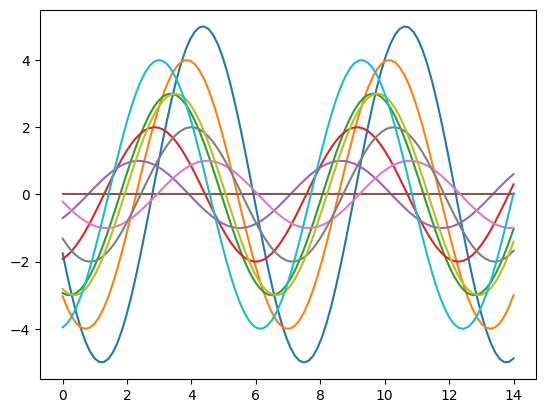

In [20]:
sinplot()

In [31]:
df.sort_values('Y1962', ascending=False).head(10)

Area_Code                            Area  Months_Code    Months  \
7175        260  Svalbard and Jan Mayen Islands         7001   January   
4884        141                        Mongolia         7012  December   
7197        260  Svalbard and Jan Mayen Islands         7012  December   
3098         85                       Greenland         7003     March   
7195        260  Svalbard and Jan Mayen Islands         7011  November   
7179        260  Svalbard and Jan Mayen Islands         7003     March   
7177        260  Svalbard and Jan Mayen Islands         7002  February   
2689         67                         Finland         7002  February   
2709         67                         Finland         7012  December   
248          30                      Antarctica         7006      June   

      Element_Code             Element Unit  Y1961  Y1962  Y1963  ...  Y2010  \
7175          6078  Standard Deviation   °C  4.373  4.373  4.373  ...  4.373   
4884          7271  Temperature change   °C -0.633  4.366  2.186  ...  0.667   
7197          6078  Standard Deviation   °C  4.189  4.189  4.189  ...  4.189   
3098          7271  Temperature change   °C -3.020  4.100  1.688  ...  2.734   
7195          6078  Standard Deviation   °C  3.946  3.946  3.946  ...  3.946   
7179          6078  Standard Deviation   °C  3.906  3.906  3.906  ...  3.906   
7177          6078  Standard Deviation   °C  3.639  3.639  3.639  ...  3.639   
2689          6078  Standard Deviation   °C  3.566  3.566  3.566  ...  3.566   
2709          6078  Standard Deviation   °C  3.499  3.499  3.499  ...  3.499   
248           7271  Temperature change   °C  3.399  3.378  2.356  ... -1.149   

      Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
7175  4.373  4.373  4.373  4.373  4.373  4.373  4.373  4.373  4.373  
4884 -0.944 -2.600  3.224  1.342  2.822  3.578  3.491 -0.794  2.053  
7197  4.189  4.189  4.189  4.189  4.189  4.189  4.189  4.189  4.189  
3098  1.387 -0.505  4.567  1.722 -0.063  3.711  0.813  1.356 -0.013  
7195  3.946  3.946  3.946  3.946  3.946  3.946  3.946  3.946  3.946  
7179  3.906  3.906  3.906  3.906  3.906  3.906  3.906  3.906  3.906  
7177  3.639  3.639  3.639  3.639  3.639  3.639  3.639  3.639  3.639  
2689  3.566  3.566  3.566  3.566  3.566  3.566  3.566  3.566  3.566  
2709  3.499  3.499  3.499  3.499  3.499  3.499  3.499  3.499  3.499  
248  -1.688 -0.882  4.040  1.474 -0.914 -0.464 -1.170  4.585 -2.644  

[10 rows x 66 columns]

from matplotlib import pyplot as plt
_df_142['Area_Code'].plot(kind='hist', bins=20, title='Area_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_143['Months_Code'].plot(kind='hist', bins=20, title='Months_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_144['Element_Code'].plot(kind='hist', bins=20, title='Element_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_145['Y1961'].plot(kind='hist', bins=20, title='Y1961')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_146.groupby('Area').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_147.groupby('Months').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_148.groupby('Element').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_149.plot(kind='scatter', x='Area_Code', y='Months_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_150.plot(kind='scatter', x='Months_Code', y='Element_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_151.plot(kind='scatter', x='Element_Code', y='Y1961', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_152.plot(kind='scatter', x='Y1961', y='Y1962', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_153['Area_Code'].plot(kind='line', figsize=(8, 4), title='Area_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_154['Months_Code'].plot(kind='line', figsize=(8, 4), title='Months_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_155['Element_Code'].plot(kind='line', figsize=(8, 4), title='Element_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_156['Y1961'].plot(kind='line', figsize=(8, 4), title='Y1961')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Months'].value_counts()
    for x_label, grp in _df_157.groupby('Area')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Area')
_ = plt.ylabel('Months')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Element'].value_counts()
    for x_label, grp in _df_158.groupby('Months')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Months')
_ = plt.ylabel('Element')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_159['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_159, x='Area_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_160['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_160, x='Area_Code', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_161['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_161, x='Area_Code', y='Element', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_162['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_162, x='Months_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [24]:
df.sort_values('Y1972', ascending=False).head(10)

Area_Code                            Area  Months_Code       Months  \
7174        260  Svalbard and Jan Mayen Islands         7001      January   
2708         67                         Finland         7012     December   
7230        210                          Sweden         7012     December   
7194        260  Svalbard and Jan Mayen Islands         7011     November   
5530        162                          Norway         7012     December   
7178        260  Svalbard and Jan Mayen Islands         7003        March   
7198        260  Svalbard and Jan Mayen Islands         7016  DecJanFeb   
7175        260  Svalbard and Jan Mayen Islands         7001      January   
9100       5402                 Northern Europe         7012     December   
252          30                      Antarctica         7008       August   

      Element_Code             Element Unit  Y1961  Y1962  Y1963  ...  Y2010  \
7174          7271  Temperature change   °C  0.836 -0.604 -5.552  ...  7.190   
2708          7271  Temperature change   °C -1.645 -2.759 -0.025  ... -4.839   
7230          7271  Temperature change   °C -1.967 -2.251  0.007  ... -5.651   
7194          7271  Temperature change   °C  2.625  2.691 -4.760  ... -2.155   
5530          7271  Temperature change   °C -1.628 -1.705 -0.310  ... -4.025   
7178          7271  Temperature change   °C  1.394 -4.876 -3.056  ... -0.162   
7198          7271  Temperature change   °C -0.888 -1.641 -5.911  ...  5.935   
7175          6078  Standard Deviation   °C  4.373  4.373  4.373  ...  4.373   
9100          7271  Temperature change   °C -1.839 -1.909 -0.327  ... -4.446   
252           7271  Temperature change   °C  2.058 -0.649  4.004  ...  1.320   

      Y2011   Y2012  Y2013  Y2014  Y2015   Y2016  Y2017  Y2018  Y2019  
7174  0.060  10.826  6.551  9.676  7.473  10.478  4.062  9.228  4.827  
2708  6.531  -3.541  4.754  3.068  5.271   3.626  3.706  2.491  5.576  
7230  4.152  -2.822  4.397  1.976  4.712   3.793  2.038  2.095  4.173  
7194  2.648   2.322  0.398  1.879  4.984   7.738  5.024  5.080  1.967  
5530  3.484  -2.673  3.771  1.763  4.029   4.296  1.158  2.193  3.202  
7178  2.098   9.007  0.459  5.478  7.590   7.399  2.835  2.252  2.433  
7198  1.058   8.143  4.793  8.216  3.495   8.018  5.654  8.385  4.831  
7175  4.373   4.373  4.373  4.373  4.373   4.373  4.373  4.373  4.373  
9100  3.586  -2.087  3.631  1.748  4.268   3.544  1.858  2.191  3.566  
252   3.752  -1.517  5.096  0.718 -1.052   3.439 -0.233  3.157 -0.134  

[10 rows x 66 columns]

from matplotlib import pyplot as plt
_df_33['Area_Code'].plot(kind='hist', bins=20, title='Area_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Months_Code'].plot(kind='hist', bins=20, title='Months_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Element_Code'].plot(kind='hist', bins=20, title='Element_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['Y1961'].plot(kind='hist', bins=20, title='Y1961')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_37.groupby('Area').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_38.groupby('Months').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_39.groupby('Element').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='Area_Code', y='Months_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='Months_Code', y='Element_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='Element_Code', y='Y1961', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='Y1961', y='Y1962', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Area_Code'].plot(kind='line', figsize=(8, 4), title='Area_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Months_Code'].plot(kind='line', figsize=(8, 4), title='Months_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Element_Code'].plot(kind='line', figsize=(8, 4), title='Element_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Y1961'].plot(kind='line', figsize=(8, 4), title='Y1961')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Months'].value_counts()
    for x_label, grp in _df_48.groupby('Area')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Area')
_ = plt.ylabel('Months')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Element'].value_counts()
    for x_label, grp in _df_49.groupby('Months')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Months')
_ = plt.ylabel('Element')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_50['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_50, x='Area_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='Area_Code', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='Area_Code', y='Element', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='Months_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [25]:
df.sort_values('Y1982', ascending=False).head(10)

Area_Code                            Area  Months_Code    Months  \
7178        260  Svalbard and Jan Mayen Islands         7003     March   
7175        260  Svalbard and Jan Mayen Islands         7001   January   
7197        260  Svalbard and Jan Mayen Islands         7012  December   
7195        260  Svalbard and Jan Mayen Islands         7011  November   
7179        260  Svalbard and Jan Mayen Islands         7003     March   
258          30                      Antarctica         7011  November   
7177        260  Svalbard and Jan Mayen Islands         7002  February   
2689         67                         Finland         7002  February   
2709         67                         Finland         7012  December   
5919        173                          Poland         7002  February   

      Element_Code             Element Unit  Y1961  Y1962  Y1963  ...  Y2010  \
7178          7271  Temperature change   °C  1.394 -4.876 -3.056  ... -0.162   
7175          6078  Standard Deviation   °C  4.373  4.373  4.373  ...  4.373   
7197          6078  Standard Deviation   °C  4.189  4.189  4.189  ...  4.189   
7195          6078  Standard Deviation   °C  3.946  3.946  3.946  ...  3.946   
7179          6078  Standard Deviation   °C  3.906  3.906  3.906  ...  3.906   
258           7271  Temperature change   °C -0.059  0.222 -1.700  ...  0.844   
7177          6078  Standard Deviation   °C  3.639  3.639  3.639  ...  3.639   
2689          6078  Standard Deviation   °C  3.566  3.566  3.566  ...  3.566   
2709          6078  Standard Deviation   °C  3.499  3.499  3.499  ...  3.499   
5919          6078  Standard Deviation   °C  3.375  3.375  3.375  ...  3.375   

      Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
7178  2.098  9.007  0.459  5.478  7.590  7.399  2.835  2.252  2.433  
7175  4.373  4.373  4.373  4.373  4.373  4.373  4.373  4.373  4.373  
7197  4.189  4.189  4.189  4.189  4.189  4.189  4.189  4.189  4.189  
7195  3.946  3.946  3.946  3.946  3.946  3.946  3.946  3.946  3.946  
7179  3.906  3.906  3.906  3.906  3.906  3.906  3.906  3.906  3.906  
258   2.917  1.766  2.632  0.820  1.742  2.539  1.747  0.630  1.653  
7177  3.639  3.639  3.639  3.639  3.639  3.639  3.639  3.639  3.639  
2689  3.566  3.566  3.566  3.566  3.566  3.566  3.566  3.566  3.566  
2709  3.499  3.499  3.499  3.499  3.499  3.499  3.499  3.499  3.499  
5919  3.375  3.375  3.375  3.375  3.375  3.375  3.375  3.375  3.375  

[10 rows x 66 columns]

from matplotlib import pyplot as plt
_df_54['Area_Code'].plot(kind='hist', bins=20, title='Area_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55['Months_Code'].plot(kind='hist', bins=20, title='Months_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56['Element_Code'].plot(kind='hist', bins=20, title='Element_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57['Y1961'].plot(kind='hist', bins=20, title='Y1961')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_58.groupby('Area').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_59.groupby('Months').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_60.groupby('Element').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61.plot(kind='scatter', x='Area_Code', y='Months_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62.plot(kind='scatter', x='Months_Code', y='Element_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_63.plot(kind='scatter', x='Element_Code', y='Y1961', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64.plot(kind='scatter', x='Y1961', y='Y1962', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65['Area_Code'].plot(kind='line', figsize=(8, 4), title='Area_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_66['Months_Code'].plot(kind='line', figsize=(8, 4), title='Months_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_67['Element_Code'].plot(kind='line', figsize=(8, 4), title='Element_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_68['Y1961'].plot(kind='line', figsize=(8, 4), title='Y1961')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Months'].value_counts()
    for x_label, grp in _df_69.groupby('Area')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Area')
_ = plt.ylabel('Months')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Element'].value_counts()
    for x_label, grp in _df_70.groupby('Months')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Months')
_ = plt.ylabel('Element')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_71['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_71, x='Area_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_72['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_72, x='Area_Code', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_73['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_73, x='Area_Code', y='Element', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_74['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_74, x='Months_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [26]:
df.sort_values('Y2000', ascending=False).head(10)

Area_Code                            Area  Months_Code    Months  \
7192        260  Svalbard and Jan Mayen Islands         7010   October   
7174        260  Svalbard and Jan Mayen Islands         7001   January   
4286        126                       Lithuania         7002  February   
648          57                         Belarus         7002  February   
4082        119                          Latvia         7002  February   
2450         63                         Estonia         7002  February   
3878        108                      Kazakhstan         7002  February   
4290        126                       Lithuania         7004     April   
7194        260  Svalbard and Jan Mayen Islands         7011  November   
652          57                         Belarus         7004     April   

      Element_Code             Element Unit  Y1961  Y1962  Y1963  ...  Y2010  \
7192          7271  Temperature change   °C  3.459 -0.096  1.689  ...  1.927   
7174          7271  Temperature change   °C  0.836 -0.604 -5.552  ...  7.190   
4286          7271  Temperature change   °C    NaN    NaN    NaN  ...  0.842   
648           7271  Temperature change   °C    NaN    NaN    NaN  ...  1.488   
4082          7271  Temperature change   °C    NaN    NaN    NaN  ...  0.087   
2450          7271  Temperature change   °C    NaN    NaN    NaN  ... -1.037   
3878          7271  Temperature change   °C    NaN    NaN    NaN  ... -2.036   
4290          7271  Temperature change   °C    NaN    NaN    NaN  ...  1.704   
7194          7271  Temperature change   °C  2.625  2.691 -4.760  ... -2.155   
652           7271  Temperature change   °C    NaN    NaN    NaN  ...  2.259   

      Y2011   Y2012  Y2013  Y2014  Y2015   Y2016  Y2017  Y2018  Y2019  
7192  2.123   2.064 -0.115  2.604  2.889   7.349  5.090  3.171  0.513  
7174  0.060  10.826  6.551  9.676  7.473  10.478  4.062  9.228  4.827  
4286 -2.378  -3.593  3.589  5.736  5.260   6.864  3.361 -0.730  6.465  
648  -2.023  -4.776  4.320  5.496  5.092   7.301  3.018 -0.057  6.504  
4082 -2.903  -3.111  3.558  6.130  5.509   6.776  3.528 -0.954  6.413  
2450 -3.223  -2.194  3.863  6.572  6.248   6.814  3.906 -0.638  6.487  
3878  0.130  -4.617  3.557 -3.379  4.217   7.123  1.610  1.689  2.416  
4290  2.770   1.873 -0.118  2.927  1.354   1.906 -0.039  4.308  2.887  
7194  2.648   2.322  0.398  1.879  4.984   7.738  5.024  5.080  1.967  
652   2.256   2.387  0.794  2.500  1.127   2.649  0.461  4.553  2.359  

[10 rows x 66 columns]

from matplotlib import pyplot as plt
_df_75['Area_Code'].plot(kind='hist', bins=20, title='Area_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_76['Months_Code'].plot(kind='hist', bins=20, title='Months_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_77['Y1961'].plot(kind='hist', bins=20, title='Y1961')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_78['Y1962'].plot(kind='hist', bins=20, title='Y1962')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_79.groupby('Area').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_80.groupby('Months').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_81.plot(kind='scatter', x='Area_Code', y='Months_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_82.plot(kind='scatter', x='Months_Code', y='Y1961', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_83.plot(kind='scatter', x='Y1961', y='Y1962', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_84.plot(kind='scatter', x='Y1962', y='Y1963', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Area_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_85.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Area_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Area_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_86.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Months')):
  _plot_series(series, series_name, i)
  fig.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Area_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Months_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_87.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Months_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Months_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_88.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Months')):
  _plot_series(series, series_name, i)
  fig.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Months_Code')

from matplotlib import pyplot as plt
_df_89['Area_Code'].plot(kind='line', figsize=(8, 4), title='Area_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_90['Months_Code'].plot(kind='line', figsize=(8, 4), title='Months_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_91['Y1961'].plot(kind='line', figsize=(8, 4), title='Y1961')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_92['Y1962'].plot(kind='line', figsize=(8, 4), title='Y1962')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Months'].value_counts()
    for x_label, grp in _df_93.groupby('Area')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Area')
_ = plt.ylabel('Months')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_94['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_94, x='Area_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_95['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_95, x='Area_Code', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_96['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_96, x='Months_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_97['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_97, x='Months_Code', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [27]:
df.sort_values('Y2010', ascending=False).head(10)

Area_Code                            Area  Months_Code       Months  \
7174        260  Svalbard and Jan Mayen Islands         7001      January   
3116         85                       Greenland         7012     December   
7198        260  Svalbard and Jan Mayen Islands         7016  DecJanFeb   
1262         33                          Canada         7003        March   
1260         33                          Canada         7002     February   
6106        146             Republic of Moldova         7011     November   
7772        230                         Ukraine         7011     November   
2460         63                         Estonia         7007         July   
1264         33                          Canada         7004        April   
3896        108                      Kazakhstan         7011     November   

      Element_Code             Element Unit  Y1961  Y1962  Y1963  ...  Y2010  \
7174          7271  Temperature change   °C  0.836 -0.604 -5.552  ...  7.190   
3116          7271  Temperature change   °C  1.113  1.616  2.177  ...  6.683   
7198          7271  Temperature change   °C -0.888 -1.641 -5.911  ...  5.935   
1262          7271  Temperature change   °C -1.023  1.879 -1.528  ...  5.847   
1260          7271  Temperature change   °C  0.301 -3.086  0.653  ...  5.768   
6106          7271  Temperature change   °C    NaN    NaN    NaN  ...  5.727   
7772          7271  Temperature change   °C    NaN    NaN    NaN  ...  5.659   
2460          7271  Temperature change   °C    NaN    NaN    NaN  ...  5.408   
1264          7271  Temperature change   °C -0.222 -0.746  1.368  ...  5.304   
3896          7271  Temperature change   °C    NaN    NaN    NaN  ...  5.179   

      Y2011   Y2012  Y2013  Y2014  Y2015   Y2016  Y2017  Y2018  Y2019  
7174  0.060  10.826  6.551  9.676  7.473  10.478  4.062  9.228  4.827  
3116  0.838   3.213  1.969  0.740 -0.281   1.425  4.447  2.867  2.769  
7198  1.058   8.143  4.793  8.216  3.495   8.018  5.654  8.385  4.831  
1262  0.231   2.455  2.169 -1.703  1.468   2.972  0.560  2.425  3.181  
1260  0.625   4.382  2.487 -0.963 -1.907   2.735  2.628 -0.330 -1.504  
6106 -1.793   1.736  3.717 -0.554  2.317  -0.763  1.131 -1.653  3.800  
7772 -1.331   2.325  3.650 -0.328  2.514  -0.638  1.078 -1.112  2.943  
2460  4.009   1.665  1.391  3.234 -0.039   1.665 -0.526  3.784  0.184  
1264 -0.770   1.573 -0.770 -0.502  0.901   0.423  0.801 -1.125  0.805  
3896 -2.229   0.771  4.714 -1.184  1.004  -2.880  3.592 -0.903 -1.807  

[10 rows x 66 columns]

from matplotlib import pyplot as plt
_df_98['Area_Code'].plot(kind='hist', bins=20, title='Area_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_99['Months_Code'].plot(kind='hist', bins=20, title='Months_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_100['Y1961'].plot(kind='hist', bins=20, title='Y1961')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_101['Y1962'].plot(kind='hist', bins=20, title='Y1962')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_102.groupby('Area').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_103.groupby('Months').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_104.plot(kind='scatter', x='Area_Code', y='Months_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_105.plot(kind='scatter', x='Months_Code', y='Y1961', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_106.plot(kind='scatter', x='Y1961', y='Y1962', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_107.plot(kind='scatter', x='Y1962', y='Y1963', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Area_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_108.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Area_Code')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Area_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_109.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Months')):
  _plot_series(series, series_name, i)
  fig.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Area_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Months_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_110.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Months_Code')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Months_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_111.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Months')):
  _plot_series(series, series_name, i)
  fig.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Months_Code')

from matplotlib import pyplot as plt
_df_112['Area_Code'].plot(kind='line', figsize=(8, 4), title='Area_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_113['Months_Code'].plot(kind='line', figsize=(8, 4), title='Months_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_114['Y1961'].plot(kind='line', figsize=(8, 4), title='Y1961')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_115['Y1962'].plot(kind='line', figsize=(8, 4), title='Y1962')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Months'].value_counts()
    for x_label, grp in _df_116.groupby('Area')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Area')
_ = plt.ylabel('Months')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_117['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_117, x='Area_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_118['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_118, x='Area_Code', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_119['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_119, x='Months_Code', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_120['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_120, x='Months_Code', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [28]:
df.sort_values('Y2019', ascending=False).head(10)

Area_Code                            Area  Months_Code    Months  \
7180        260  Svalbard and Jan Mayen Islands         7004     April   
648          57                         Belarus         7002  February   
2450         63                         Estonia         7002  February   
4286        126                       Lithuania         7002  February   
4082        119                          Latvia         7002  February   
2708         67                         Finland         7012  December   
668          57                         Belarus         7012  December   
8024        235                      Uzbekistan         7001   January   
5918        173                          Poland         7002  February   
3880        108                      Kazakhstan         7003     March   

      Element_Code             Element Unit  Y1961  Y1962  Y1963  ...  Y2010  \
7180          7271  Temperature change   °C -0.819 -1.598 -1.972  ...  3.368   
648           7271  Temperature change   °C    NaN    NaN    NaN  ...  1.488   
2450          7271  Temperature change   °C    NaN    NaN    NaN  ... -1.037   
4286          7271  Temperature change   °C    NaN    NaN    NaN  ...  0.842   
4082          7271  Temperature change   °C    NaN    NaN    NaN  ...  0.087   
2708          7271  Temperature change   °C -1.645 -2.759 -0.025  ... -4.839   
668           7271  Temperature change   °C    NaN    NaN    NaN  ... -3.224   
8024          7271  Temperature change   °C    NaN    NaN    NaN  ...  3.145   
5918          7271  Temperature change   °C  4.476 -0.108 -5.718  ...  0.474   
3880          7271  Temperature change   °C    NaN    NaN    NaN  ...  1.784   

      Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
7180  5.618  1.644  1.497  1.142  5.394  4.674  2.811  2.721  7.215  
648  -2.023 -4.776  4.320  5.496  5.092  7.301  3.018 -0.057  6.504  
2450 -3.223 -2.194  3.863  6.572  6.248  6.814  3.906 -0.638  6.487  
4286 -2.378 -3.593  3.589  5.736  5.260  6.864  3.361 -0.730  6.465  
4082 -2.903 -3.111  3.558  6.130  5.509  6.776  3.528 -0.954  6.413  
2708  6.531 -3.541  4.754  3.068  5.271  3.626  3.706  2.491  5.576  
668   4.917 -2.221  3.572  1.108  5.193  1.846  4.213  1.615  5.510  
8024  0.598 -0.823  3.331  1.129  2.624  5.739  3.260  1.453  5.430  
5918 -0.772 -3.490  1.750  4.999  3.191  5.657  2.665 -0.681  5.406  
3880  0.149  1.198  5.609  3.471  1.582  6.671  1.711  2.624  5.366  

[10 rows x 66 columns]

from matplotlib import pyplot as plt
_df_121['Area_Code'].plot(kind='hist', bins=20, title='Area_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_122['Months_Code'].plot(kind='hist', bins=20, title='Months_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_123['Y1961'].plot(kind='hist', bins=20, title='Y1961')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_124['Y1962'].plot(kind='hist', bins=20, title='Y1962')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_125.groupby('Months').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_126.plot(kind='scatter', x='Area_Code', y='Months_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_127.plot(kind='scatter', x='Months_Code', y='Y1961', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_128.plot(kind='scatter', x='Y1961', y='Y1962', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_129.plot(kind='scatter', x='Y1962', y='Y1963', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Area_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_130.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Months')):
  _plot_series(series, series_name, i)
  fig.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Area_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Months_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_131.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Months')):
  _plot_series(series, series_name, i)
  fig.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Months_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Y1961']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_132.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Months')):
  _plot_series(series, series_name, i)
  fig.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Y1961')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Element_Code']
  ys = series['Y1962']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_133.sort_values('Element_Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Months')):
  _plot_series(series, series_name, i)
  fig.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Element_Code')
_ = plt.ylabel('Y1962')

from matplotlib import pyplot as plt
_df_134['Area_Code'].plot(kind='line', figsize=(8, 4), title='Area_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_135['Months_Code'].plot(kind='line', figsize=(8, 4), title='Months_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_136['Y1961'].plot(kind='line', figsize=(8, 4), title='Y1961')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_137['Y1962'].plot(kind='line', figsize=(8, 4), title='Y1962')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_138['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_138, x='Area_Code', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_139['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_139, x='Months_Code', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_140['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_140, x='Y1961', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_141['Months'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_141, x='Y1962', y='Months', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [32]:
print("'Sum of January with 10 years diff of 1961, 1972, 1982, 2000, 2010, 2019'")
df[df.Months == 'January'][['Y1962', 'Y1972', 'Y1982', 'Y2000', 'Y2010','Y2019']].sum()

'Sum of January with 10 years diff of 1961, 1972, 1982, 2000, 2010, 2019'


Y1962    261.985
Y1972    173.878
Y1982    287.835
Y2000    327.268
Y2010    427.754
Y2019    535.343
dtype: float64

With the use of world population dataset which I use to merge environment temperature so i can make use of the continent to know the level of envitonment temperature changes in each of the continent.

In [34]:
locations_df = pd.read_csv('/content/world_population.csv')
locations_df

Rank CCA3  Country/Territory           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          2913399   
2           44903225         43451666         39543154         35856344   
3              44273            46189            51368            54849   
4              79824            77700            71746            71519   
..               ...              ...              ...              ...   
229            11572            11655            12182            13142   
230           575986           556048           491824           413296   
231         33696614         32284046         28516545         24743946   
232         20017675         18927715         16248230         13792086   
233         16320537         15669666         14154937         12839771   

     2000 Population  1990 Population  1980 Population  1970 Population  \
0           19542982         10694796         12486631         10752971   
1            3182021          3295066          2941651          2324731   
2           30774621         25518074         18739378         13795915   
3              58230            47818            32886            27075   
4              66097            53569            35611            19860   
..               ...              ...              ...              ...   
229            14723            13454            11315             9377   
230           270375           178529           116775            76371   
231         18628700         13375121          9204938          6843607   
232          9891136          7686401          5720438          4281671   
233         11834676         10113893          7049926          5202918   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
0        652230            63.0587       1.0257                         0.52  
1         28748            98.8702       0.9957                         0.04  
2       2381741            18.8531       1.0164                         0.56  
3           199           222.4774       0.9831                         0.00  
4           468           170.5641       1.0100                         0.00  
..          ...                ...          ...                          ...  
229         142            81.4930       0.9953                         0.00  
230      266000             2.1654       1.0184                         0.01  
231      527968            63.8232       1.0217                         0.42  
232      752612            26.5976       1.0280                         0.25  
233      390757            41.7665       1.0204                         0.20  

[234 rows x 17 columns]

In [35]:
locations_df.rename(columns = {'Country/Territory':'Area'}, inplace = True)
locations_df

Rank CCA3               Area           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          2913399   
2           44903225         43451666         39543154         35856344   
3              44273            46189            51368            54849   
4              79824            77700            71746            71519   
..               ...              ...              ...              ...   
229            11572            11655            12182            13142   
230           575986           556048           491824           413296   
231         33696614         32284046         28516545         24743946   
232         20017675         18927715         16248230         13792086   
233         16320537         15669666         14154937         12839771   

     2000 Population  1990 Population  1980 Population  1970 Population  \
0           19542982         10694796         12486631         10752971   
1            3182021          3295066          2941651          2324731   
2           30774621         25518074         18739378         13795915   
3              58230            47818            32886            27075   
4              66097            53569            35611            19860   
..               ...              ...              ...              ...   
229            14723            13454            11315             9377   
230           270375           178529           116775            76371   
231         18628700         13375121          9204938          6843607   
232          9891136          7686401          5720438          4281671   
233         11834676         10113893          7049926          5202918   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
0        652230            63.0587       1.0257                         0.52  
1         28748            98.8702       0.9957                         0.04  
2       2381741            18.8531       1.0164                         0.56  
3           199           222.4774       0.9831                         0.00  
4           468           170.5641       1.0100                         0.00  
..          ...                ...          ...                          ...  
229         142            81.4930       0.9953                         0.00  
230      266000             2.1654       1.0184                         0.01  
231      527968            63.8232       1.0217                         0.42  
232      752612            26.5976       1.0280                         0.25  
233      390757            41.7665       1.0204                         0.20  

[234 rows x 17 columns]

In [36]:
locations_df[locations_df.Area == 'Nigeria']

Rank CCA3     Area Capital Continent  2022 Population  2020 Population  \
149     6  NGA  Nigeria   Abuja    Africa        218541212        208327405   

     2015 Population  2010 Population  2000 Population  1990 Population  \
149        183995785        160952853        122851984         95214257   

     1980 Population  1970 Population  Area (km²)  Density (per km²)  \
149         72951439         55569264      923768           236.5759   

     Growth Rate  World Population Percentage  
149       1.0241                         2.74

**To merge to dataset with the are Area**

In [37]:
#We can now add the columns from locations_df into Environment_Temperature_df using the (.merge)

merged_df = df.merge(locations_df, on='Area')

In [38]:
merged_df

Area_Code         Area  Months_Code               Months  Element_Code  \
0             2  Afghanistan         7001              January          7271   
1             2  Afghanistan         7001              January          6078   
2             2  Afghanistan         7002             February          7271   
3             2  Afghanistan         7002             February          6078   
4             2  Afghanistan         7003                March          7271   
...         ...          ...          ...                  ...           ...   
6795       5503   Micronesia         7018          JunJulAug          6078   
6796       5503   Micronesia         7019          SepOctNov          7271   
6797       5503   Micronesia         7019          SepOctNov          6078   
6798       5503   Micronesia         7020  Meteorological year          7271   
6799       5503   Micronesia         7020  Meteorological year          6078   

                 Element Unit  Y1961  Y1962  Y1963  ...  2015 Population  \
0     Temperature change   °C  0.777  0.062  2.744  ...         33753499   
1     Standard Deviation   °C  1.950  1.950  1.950  ...         33753499   
2     Temperature change   °C -1.743  2.465  3.919  ...         33753499   
3     Standard Deviation   °C  2.597  2.597  2.597  ...         33753499   
4     Temperature change   °C  0.516  1.336  0.403  ...         33753499   
...                  ...  ...    ...    ...    ...  ...              ...   
6795  Standard Deviation   °C  0.223  0.223  0.223  ...           109462   
6796  Temperature change   °C -0.217  0.012  0.097  ...           109462   
6797  Standard Deviation   °C  0.222  0.222  0.222  ...           109462   
6798  Temperature change   °C  0.002 -0.031  0.058  ...           109462   
6799  Standard Deviation   °C  0.155  0.155  0.155  ...           109462   

      2010 Population  2000 Population  1990 Population  1980 Population  \
0            28189672         19542982         10694796         12486631   
1            28189672         19542982         10694796         12486631   
2            28189672         19542982         10694796         12486631   
3            28189672         19542982         10694796         12486631   
4            28189672         19542982         10694796         12486631   
...               ...              ...              ...              ...   
6795           107588           111709            98603            76299   
6796           107588           111709            98603            76299   
6797           107588           111709            98603            76299   
6798           107588           111709            98603            76299   
6799           107588           111709            98603            76299   

      1970 Population  Area (km²)  Density (per km²)  Growth Rate  \
0            10752971      652230            63.0587       1.0257   
1            10752971      652230            63.0587       1.0257   
2            10752971      652230            63.0587       1.0257   
3            10752971      652230            63.0587       1.0257   
4            10752971      652230            63.0587       1.0257   
...               ...         ...                ...          ...   
6795            58989         702           162.6268       1.0091   
6796            58989         702           162.6268       1.0091   
6797            58989         702           162.6268       1.0091   
6798            58989         702           162.6268       1.0091   
6799            58989         702           162.6268       1.0091   

      World Population Percentage  
0                            0.52  
1                            0.52  
2                            0.52  
3                            0.52  
4                            0.52  
...                           ...  
6795                         0.00  
6796                         0.00  
6797                         0.00  
6798                         0

from matplotlib import pyplot as plt
_df_163['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_164['Area_Code'].plot(kind='hist', bins=20, title='Area_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_165['Months_Code'].plot(kind='hist', bins=20, title='Months_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_166['Element_Code'].plot(kind='hist', bins=20, title='Element_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_167.groupby('Element').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_168.plot(kind='scatter', x='index', y='Area_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_169.plot(kind='scatter', x='Area_Code', y='Months_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_170.plot(kind='scatter', x='Months_Code', y='Element_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_171.plot(kind='scatter', x='Element_Code', y='Y1961', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Area_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_172.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Element')):
  _plot_series(series, series_name, i)
  fig.legend(title='Element', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Area_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Months_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_173.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Element')):
  _plot_series(series, series_name, i)
  fig.legend(title='Element', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Months_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Element_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_174.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Element')):
  _plot_series(series, series_name, i)
  fig.legend(title='Element', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Element_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Y1961']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_175.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Element')):
  _plot_series(series, series_name, i)
  fig.legend(title='Element', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Y1961')

from matplotlib import pyplot as plt
_df_176['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_177['Area_Code'].plot(kind='line', figsize=(8, 4), title='Area_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_178['Months_Code'].plot(kind='line', figsize=(8, 4), title='Months_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_179['Element_Code'].plot(kind='line', figsize=(8, 4), title='Element_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_180['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_180, x='index', y='Element', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_181['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_181, x='Area_Code', y='Element', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_182['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_182, x='Months_Code', y='Element', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_183['Element'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_183, x='Element_Code', y='Element', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [39]:
#Grouping and aggregation
Environment_Continent_df = merged_df.groupby('Continent')[['Y1962', 'Y1972', 'Y1982', 'Y2000', 'Y2010', 'Y2019']].sum()
Environment_Continent_df

Y1962    Y1972    Y1982     Y2000     Y2010     Y2019
Continent                                                             
Africa         415.255  438.531  591.039   836.963  1535.805  1630.327
Asia           493.618  250.550  285.903   773.692  1380.550  1284.890
Europe         479.955  608.908  806.432  1626.345  1049.976  2094.802
North America  281.992  232.274  354.286   467.060   893.080   953.276
Oceania        111.459   96.156  139.498   231.491   349.534   388.409
South America   73.407  135.424  170.351   151.730   265.144   325.571

from matplotlib import pyplot as plt
Environment_Continent_df['Y1962'].plot(kind='hist', bins=20, title='Y1962')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df['Y1972'].plot(kind='hist', bins=20, title='Y1972')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df['Y1982'].plot(kind='hist', bins=20, title='Y1982')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df['Y2000'].plot(kind='hist', bins=20, title='Y2000')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df.plot(kind='scatter', x='Y1962', y='Y1972', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df.plot(kind='scatter', x='Y1972', y='Y1982', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df.plot(kind='scatter', x='Y1982', y='Y2000', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df.plot(kind='scatter', x='Y2000', y='Y2010', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df['Y1962'].plot(kind='line', figsize=(8, 4), title='Y1962')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df['Y1972'].plot(kind='line', figsize=(8, 4), title='Y1972')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df['Y1982'].plot(kind='line', figsize=(8, 4), title='Y1982')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Environment_Continent_df['Y2000'].plot(kind='line', figsize=(8, 4), title='Y2000')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': 'Sum of the Continent Environment Temperature of 10 Year different'}, xlabel='Continent'>

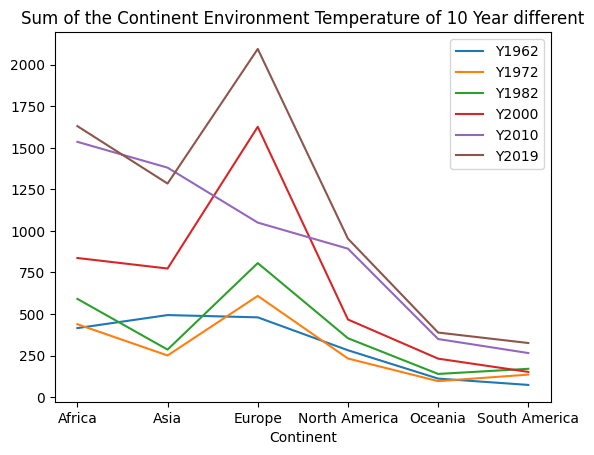

In [40]:
Environment_Continent_df.plot(title='Sum of the Continent Environment Temperature of 10 Year different')

In [41]:
Environment_mean_df = merged_df.groupby('Continent')[['Y1962', 'Y1972', 'Y1982', 'Y2000', 'Y2010', 'Y2019']].mean()
Environment_mean_df

Y1962     Y1972     Y1982     Y2000     Y2010     Y2019
Continent                                                                
Africa         0.259859  0.274425  0.375025  0.528386  0.972028  1.025363
Asia           0.456209  0.231562  0.264725  0.682268  1.194247  1.111497
Europe         0.470544  0.596969  0.790620  1.328713  0.834639  1.665184
North America  0.259184  0.207018  0.327739  0.435690  0.795971  0.859582
Oceania        0.192836  0.167519  0.234450  0.425535  0.628658  0.742656
South America  0.196275  0.362096  0.455484  0.405695  0.708941  0.870511

from matplotlib import pyplot as plt
Environment_mean_df['Y1962'].plot(kind='hist', bins=20, title='Y1962')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df['Y1972'].plot(kind='hist', bins=20, title='Y1972')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df['Y1982'].plot(kind='hist', bins=20, title='Y1982')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df['Y2000'].plot(kind='hist', bins=20, title='Y2000')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df.plot(kind='scatter', x='Y1962', y='Y1972', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df.plot(kind='scatter', x='Y1972', y='Y1982', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df.plot(kind='scatter', x='Y1982', y='Y2000', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df.plot(kind='scatter', x='Y2000', y='Y2010', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df['Y1962'].plot(kind='line', figsize=(8, 4), title='Y1962')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df['Y1972'].plot(kind='line', figsize=(8, 4), title='Y1972')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df['Y1982'].plot(kind='line', figsize=(8, 4), title='Y1982')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Environment_mean_df['Y2000'].plot(kind='line', figsize=(8, 4), title='Y2000')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': 'Sum of the Continent Environment Temperature of 10 Year different'}, xlabel='Continent'>

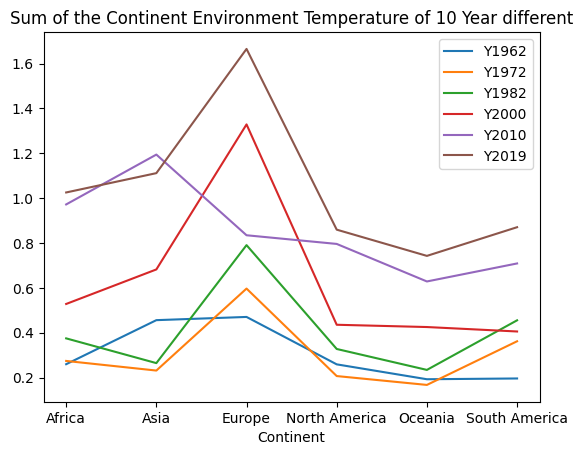

In [43]:
Environment_mean_df.plot(title='Sum of the Continent Environment Temperature of 10 Year different')